# Loan Repayment Prediction Using Machine Learning Classification Algorithms

# Problem Statement:
This project aims to develop machine learning models to assist financial institutions in predicting whether a borrower will fully repay a loan or default. By leveraging historical loan data, the goal is to improve risk assessment, aiding lenders in making informed decisions and enhancing loan approval processes.

# Introduction:
This project explores predictive analytics in the lending industry, aiming to develop machine learning models for predicting loan repayment behavior. Using a dataset containing borrower attributes like credit policy, loan purpose, and credit score, the goal is to create models that classify borrowers into those likely to fully repay loans and those at risk of default. These models, including Logistic Regression, Random Forest, and SVM, are designed to assist lenders in making informed decisions to manage risks and improve loan approval processes.

# Data Preprocessing

In [2]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
loan_df=pd.read_csv(r"C:\Users\fathi\Downloads\DS2_C5_S1_Loan_Data_Concept (1).csv")

In [4]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loan_df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [6]:
loan_df.shape

(9578, 14)

In [7]:
loan_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
loan_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [10]:
loan_df[loan_df.duplicated()]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

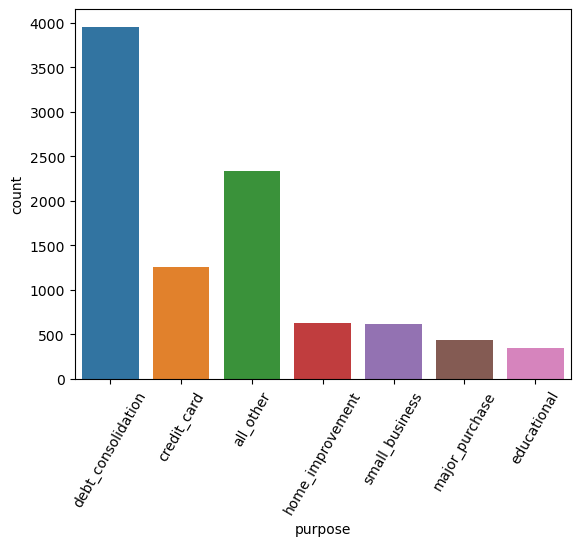

In [11]:
sb.countplot(x=loan_df['purpose'])
plt.xticks(rotation=60)

<Axes: xlabel='not.fully.paid', ylabel='count'>

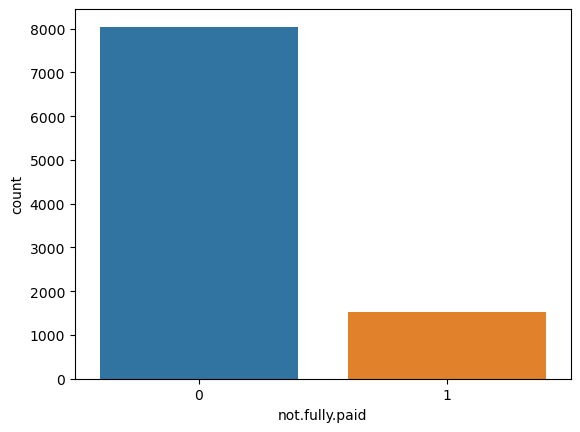

In [12]:
sb.countplot(x=loan_df['not.fully.paid'])

In [13]:
loan_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<Axes: xlabel='int.rate', ylabel='Count'>

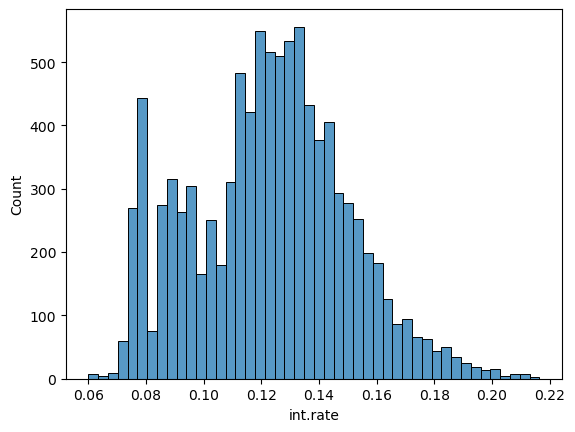

In [14]:
sb.histplot(loan_df['int.rate'])

<Axes: xlabel='int.rate', ylabel='Density'>

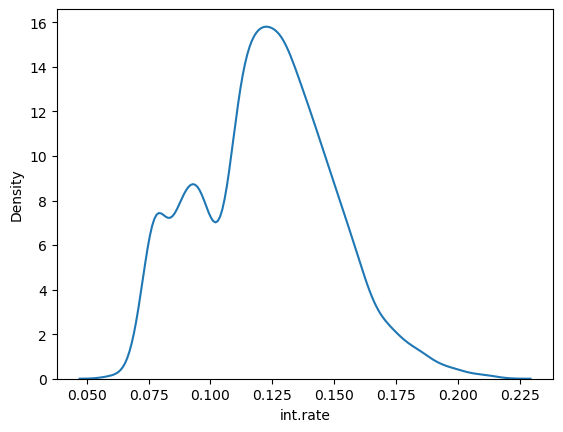

In [15]:
sb.kdeplot(loan_df['int.rate'])

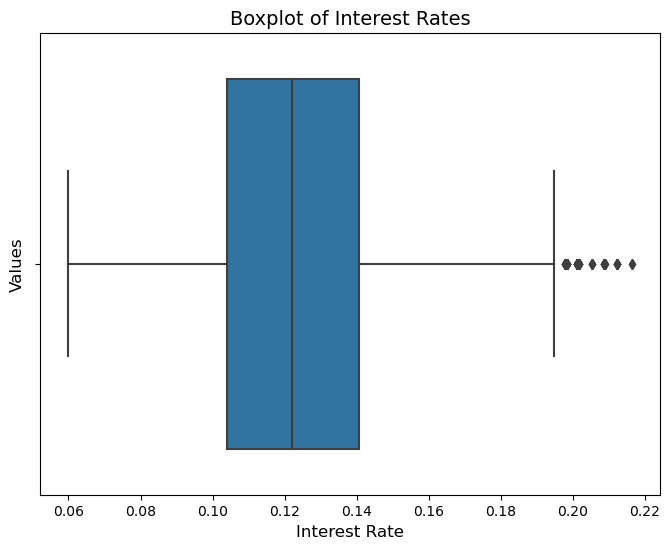

In [17]:
# Create the boxplot
plt.figure(figsize=(8, 6))
s.boxplot(x=loan_df['int.rate'])

# Add labels and title
plt.xlabel('Interest Rate', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Boxplot of Interest Rates', fontsize=14)

# Display the plot
plt.show()

# EDA:

In [ ]:
#1. Numeric column analysis

In [19]:
num=loan_df.select_dtypes(exclude=object).columns

In [21]:
num

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

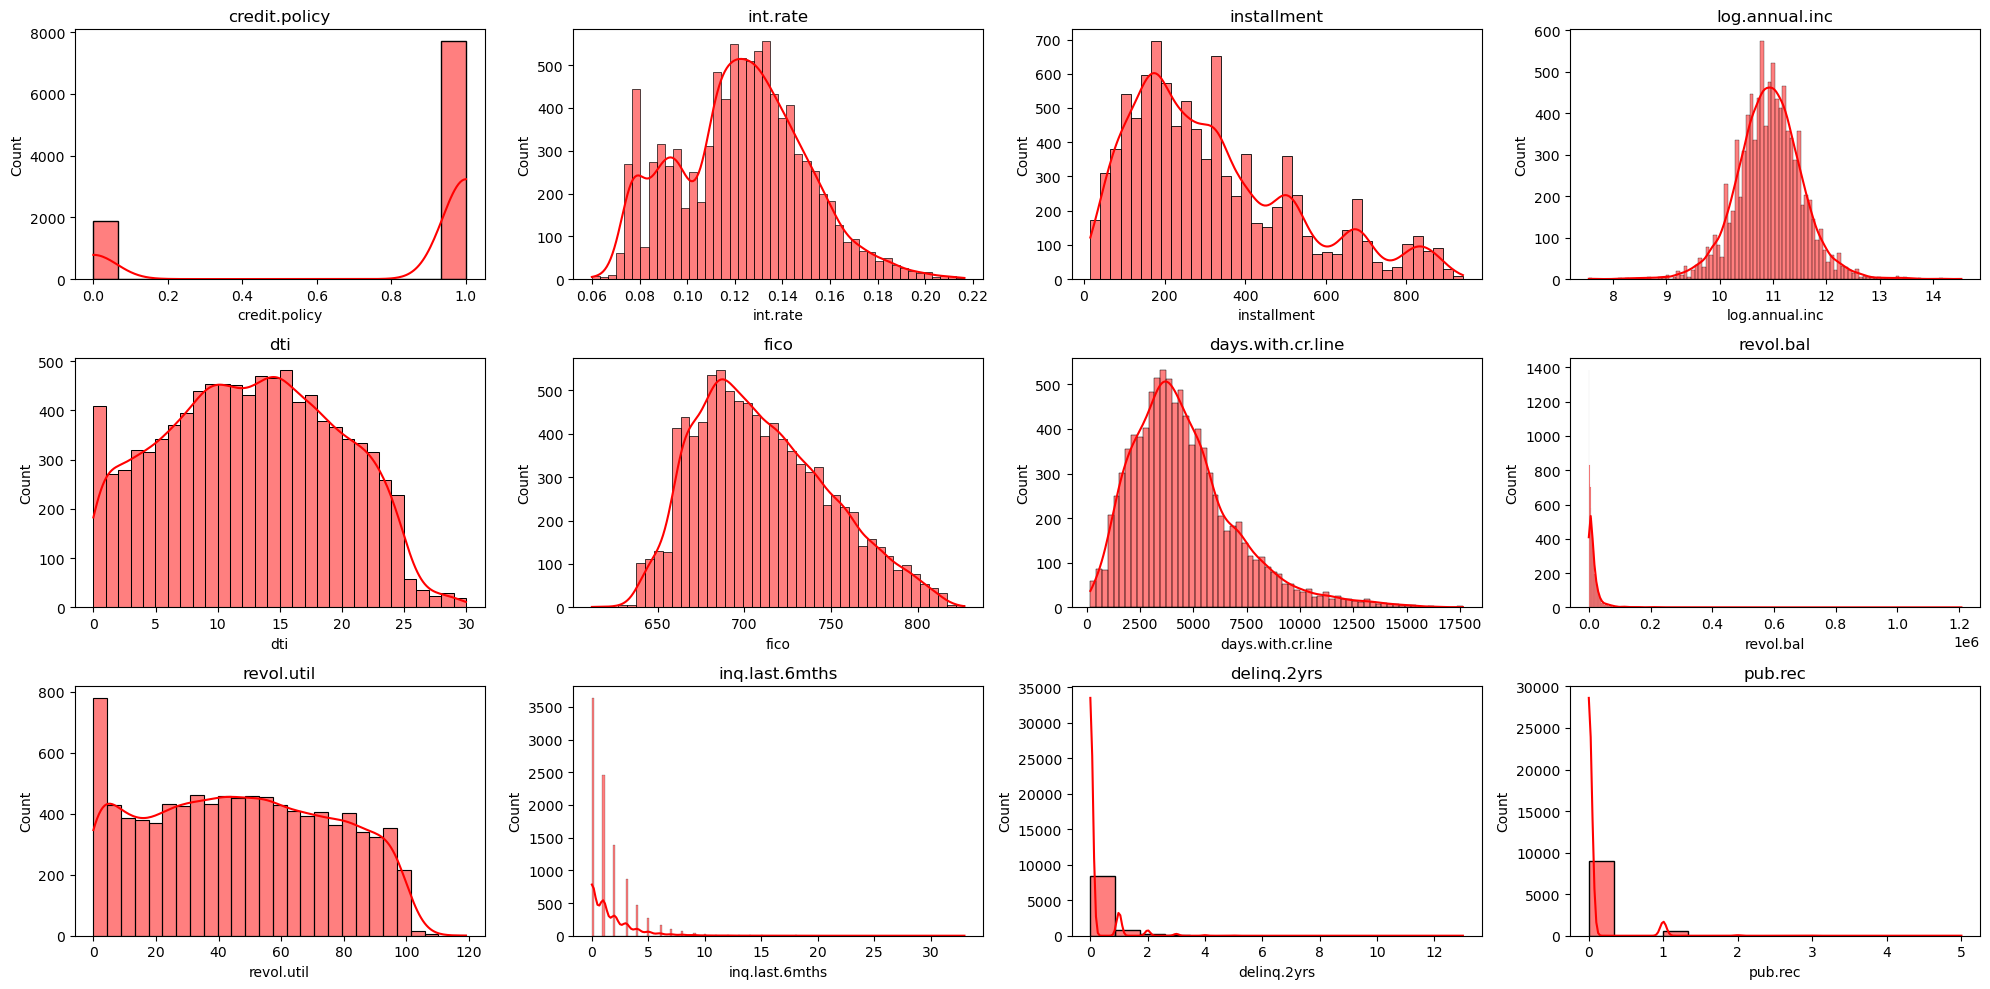

In [20]:
numeric_cols=num
num_cols=4
n_bins=30
# compute number of rows for plot
num_rows= int(len(numeric_cols)/num_cols)
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=False,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):#flatten used to convert the multidimention to single dimention
    #ax.hist(loan_df[col],bins=n_bins,density=True)
    sb.histplot(loan_df[col],ax=ax,kde=True,color='Red')
    ax.set_title(col)
plt.show()    

In [ ]:
#2. Categorical Analysis

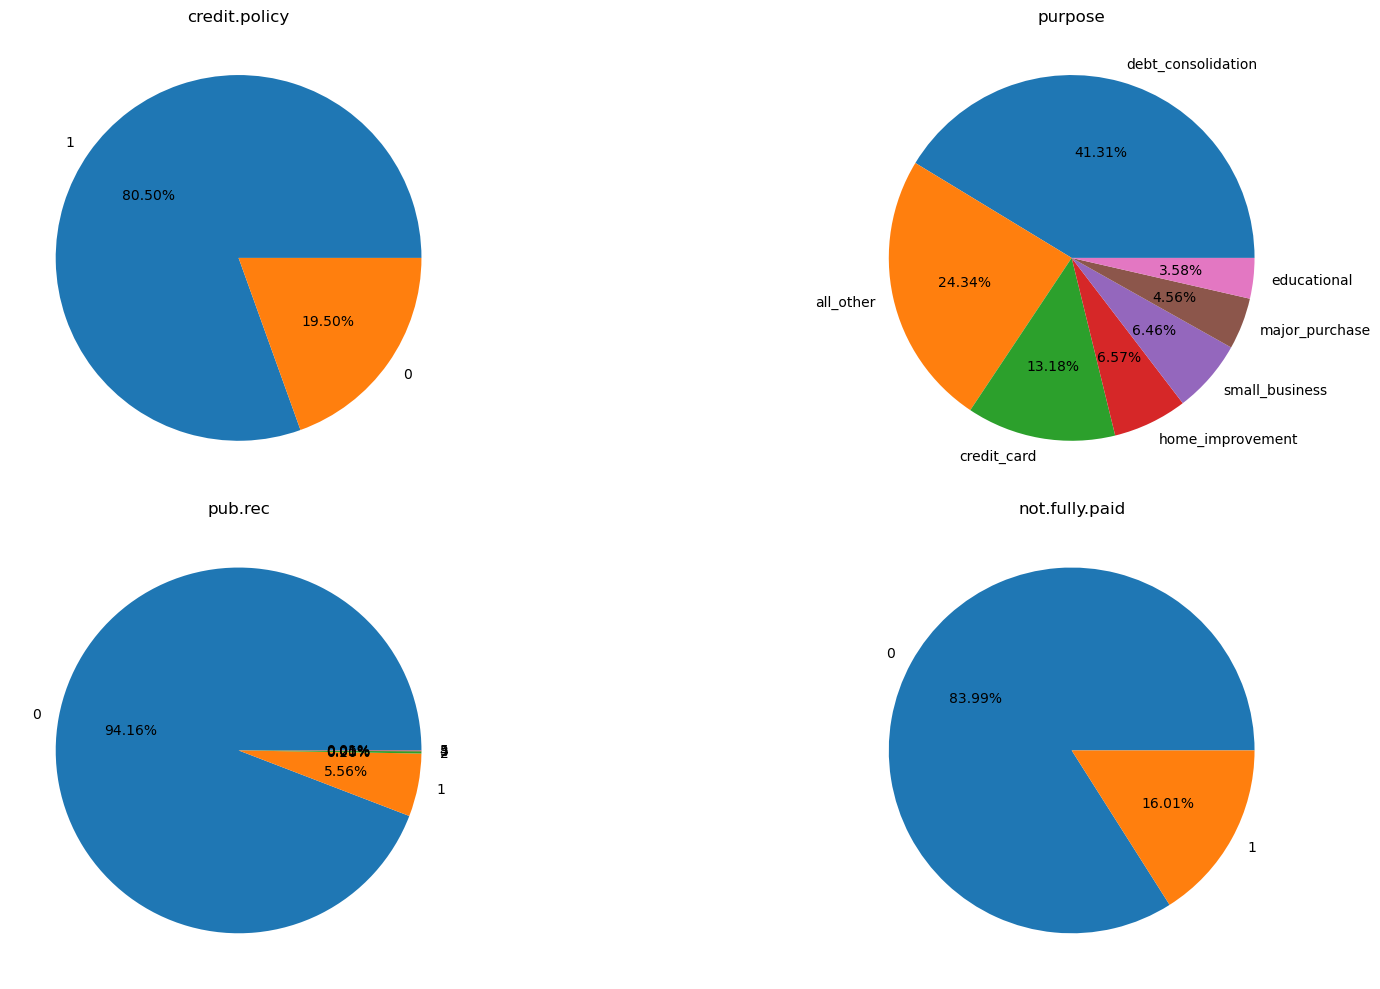

In [18]:
cat=[]
num=[]
for i in loan_df.columns:
    if loan_df[i].nunique()<10:
        cat.append(i)
    else:
        num.append(i)
      
numeric_cols=cat
num_cols=2
# compute number of rows for plot
num_rows= int(len(numeric_cols)/num_cols)
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):#flatten used to convert the multidimention to single dimention
    ax.pie(labels=loan_df[col].value_counts().index,x=loan_df[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col)
plt.show()

In [19]:
cat

['credit.policy', 'purpose', 'pub.rec', 'not.fully.paid']

In [20]:
num

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs']

In [25]:
num_df=loan_df.loc[:,num]

# Feature Engineering

In [27]:
# One-hot encode categorical variables
loan_df_encoded = pd.get_dummies(loan_df)

In [28]:
# Create the correlation matrix
corr_matrix = loan_df_encoded.corr()

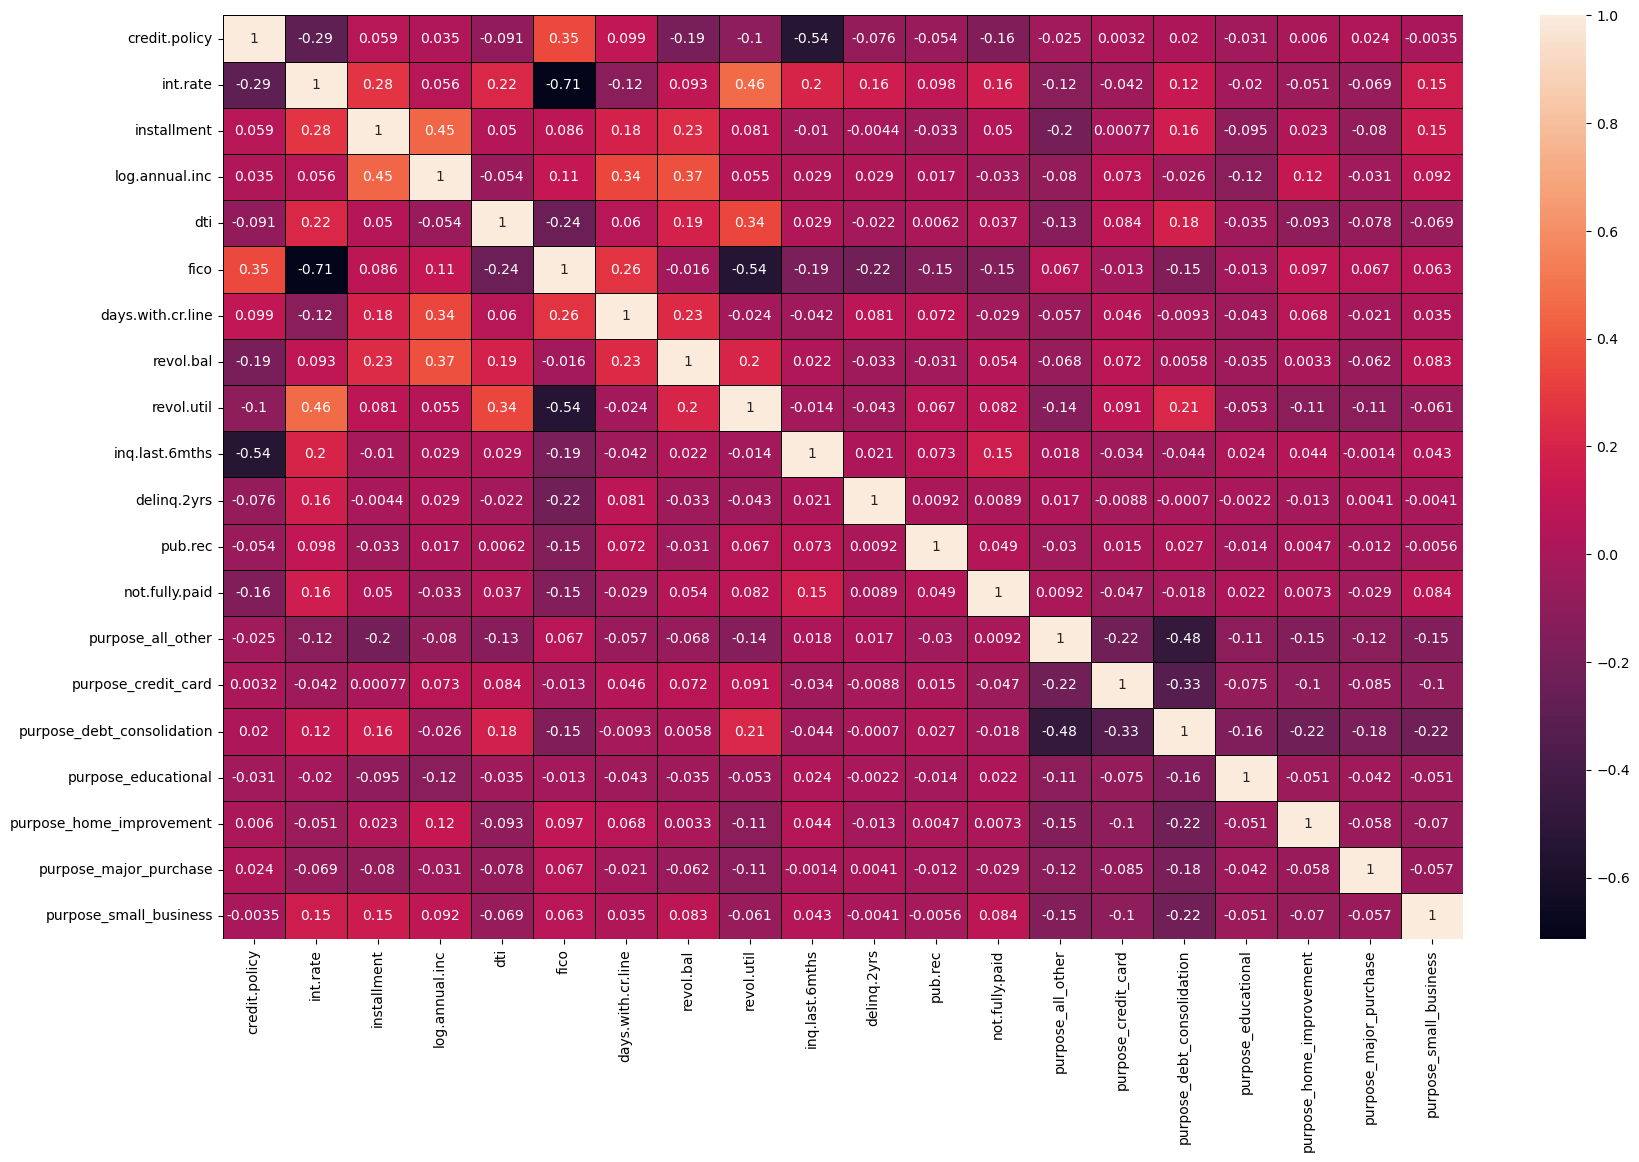

In [31]:
# Create the heatmap
plt.figure(figsize=(20, 12))
sb.heatmap(corr_matrix, annot=True, linecolor='black', linewidths=0.5)
plt.show()

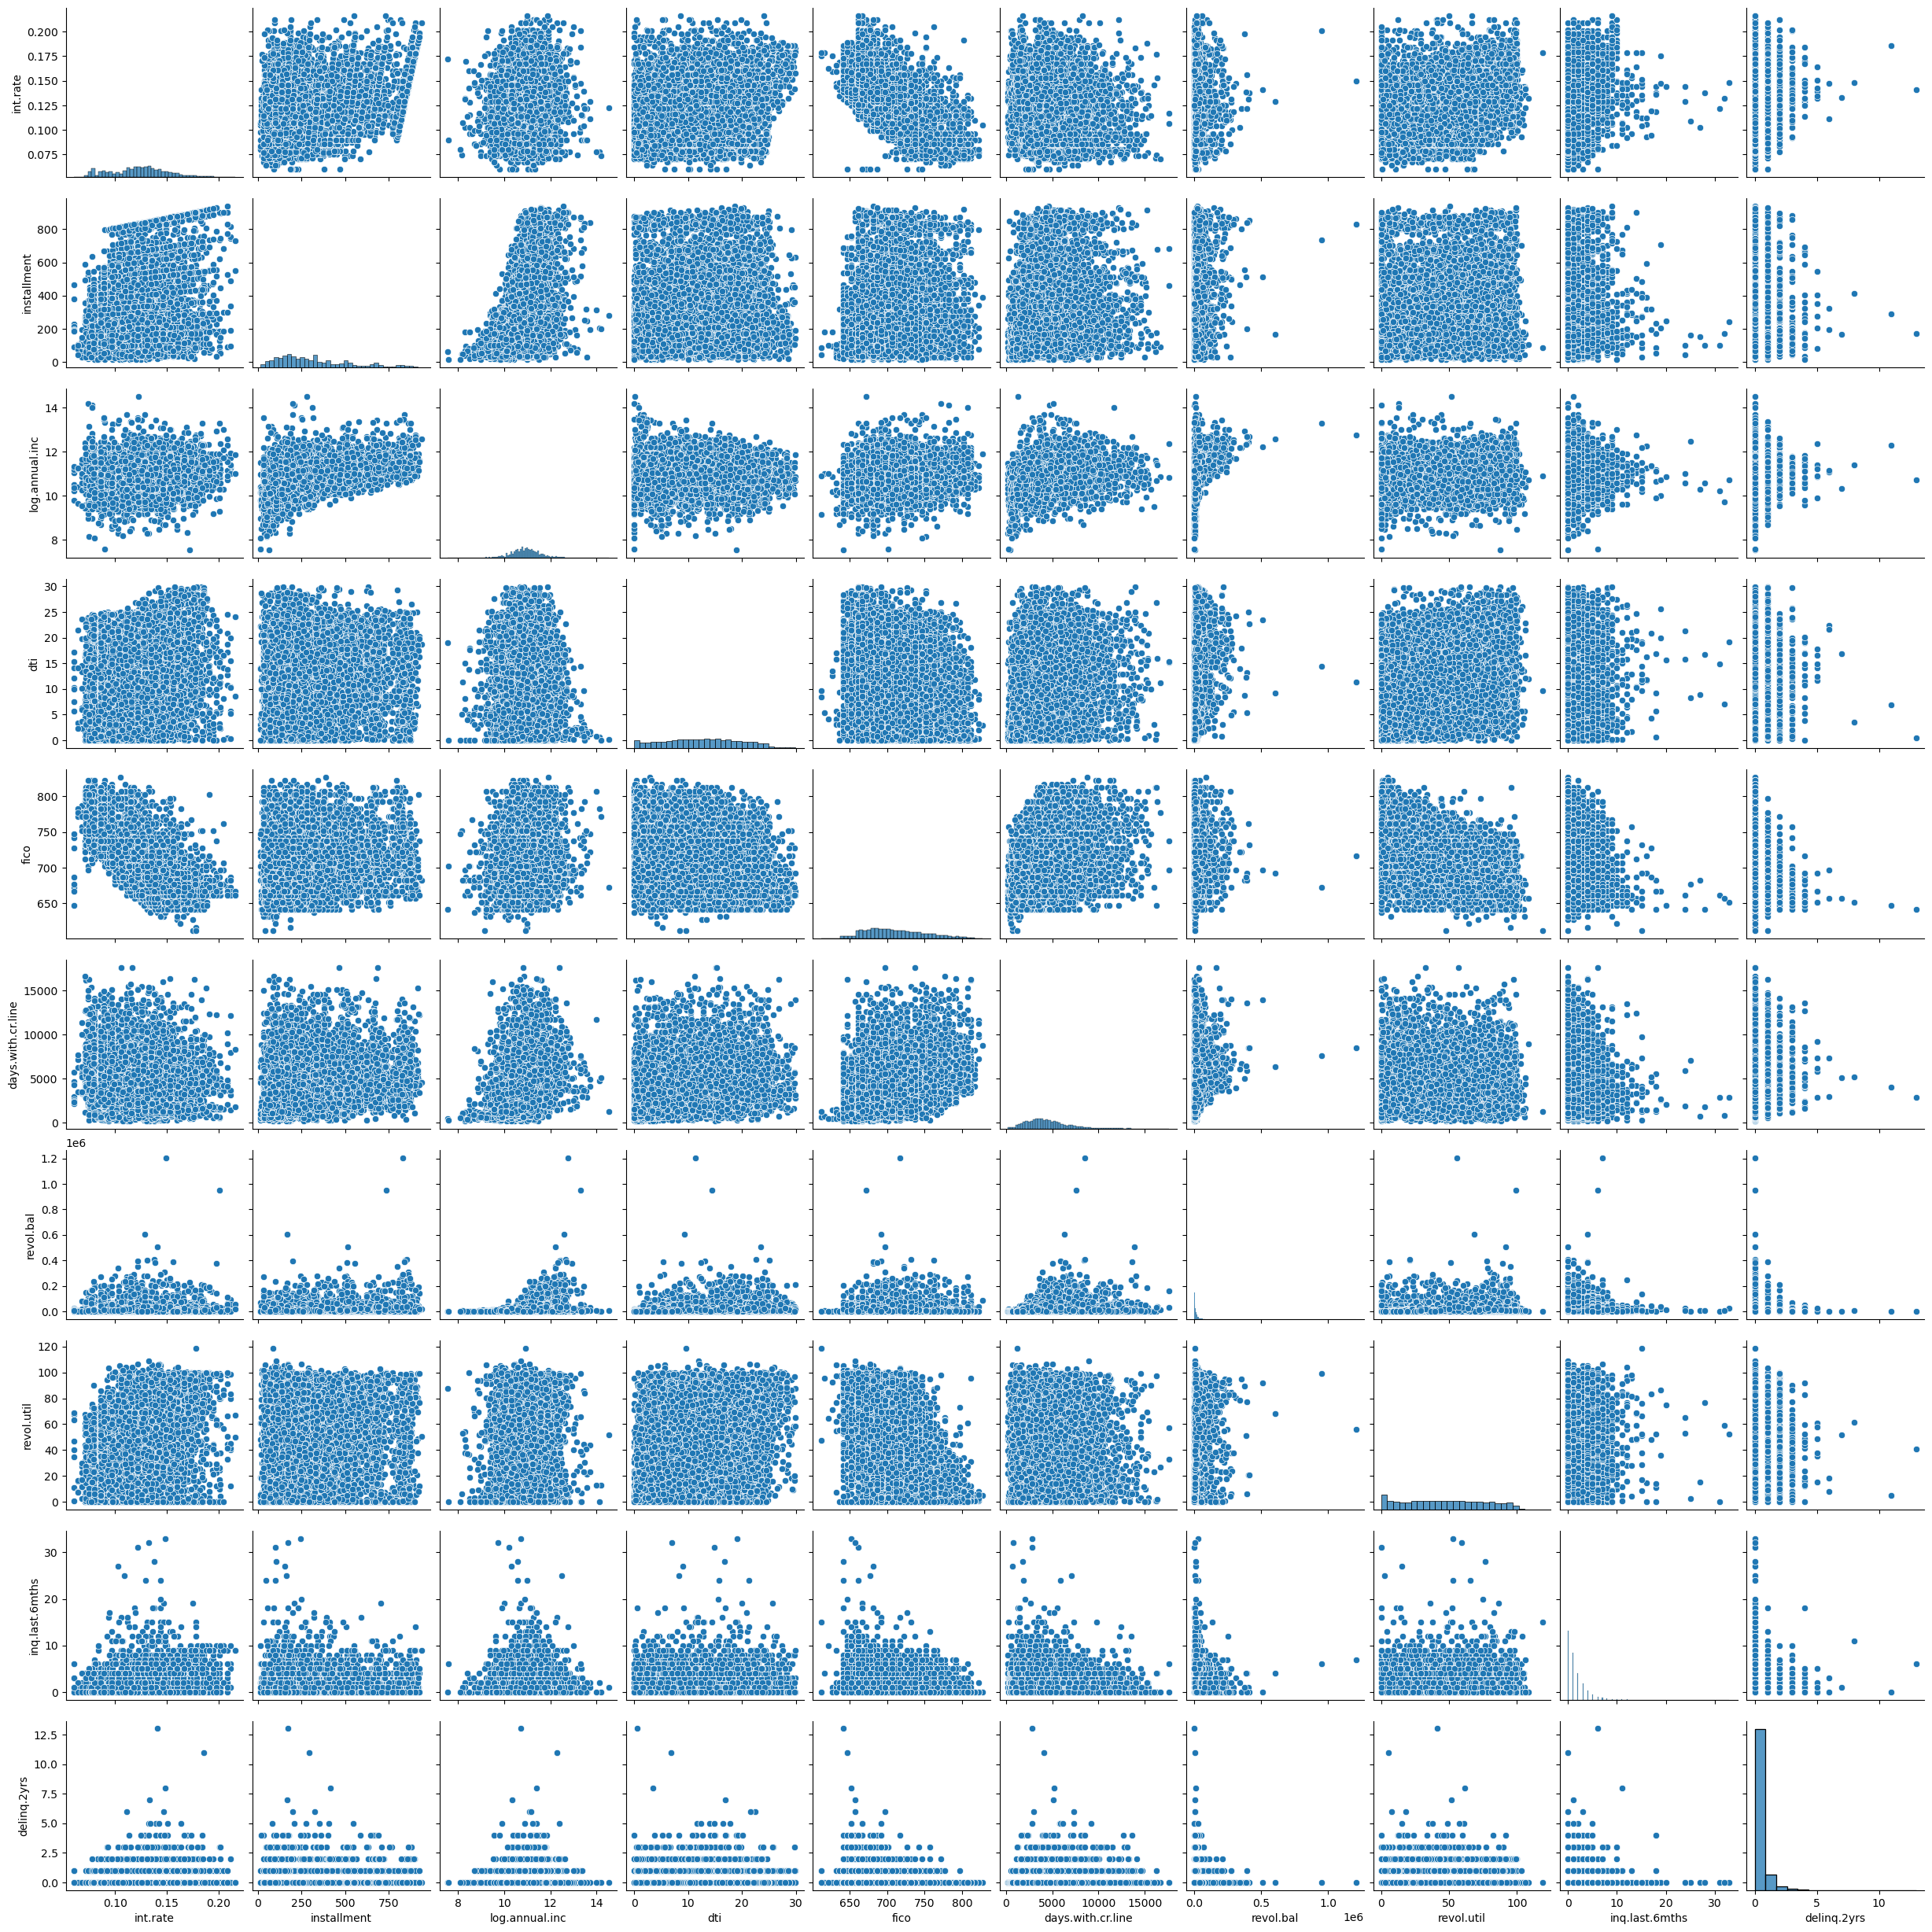

In [25]:
sb.pairplot(num_df)

<Axes: xlabel='purpose'>

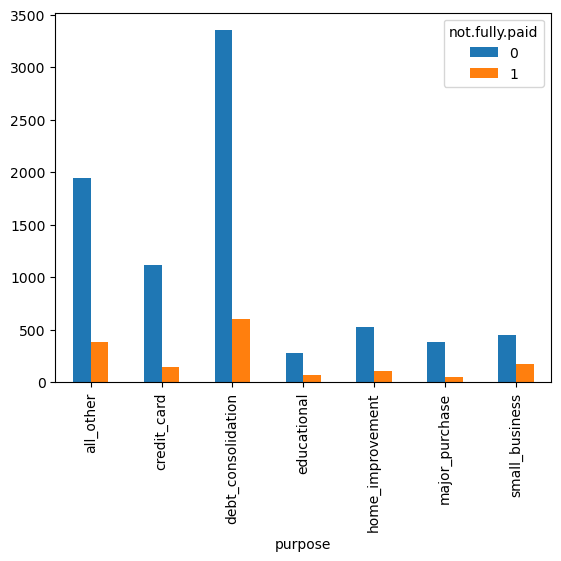

In [26]:
#purpose vs Not fullitypaid(Target)
pd.crosstab(loan_df['purpose'],loan_df['not.fully.paid']).plot(kind='bar')

<Axes: xlabel='credit.policy'>

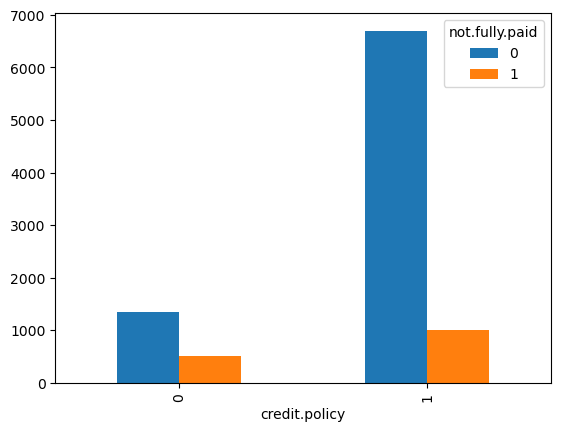

In [27]:
 pd.crosstab(loan_df['credit.policy'],loan_df['not.fully.paid']).plot(kind='bar')

In [28]:
loan_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<Axes: xlabel='not.fully.paid', ylabel='int.rate'>

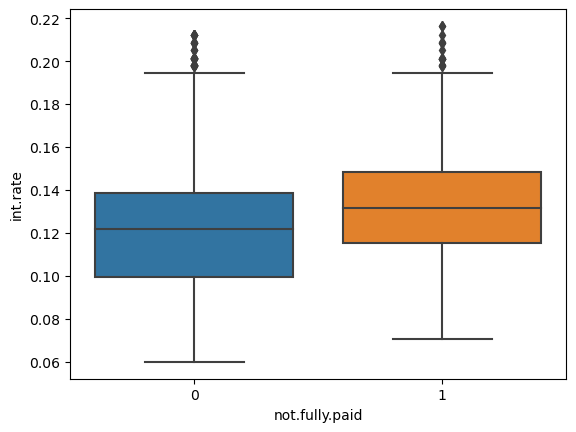

In [29]:
sb.boxplot(x=loan_df['not.fully.paid'],y=loan_df['int.rate'])

In [30]:
#feature conversion
from sklearn.preprocessing import LabelEncoder
loan_df['purpose']=LabelEncoder().fit_transform(loan_df['purpose'])
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scale=pd.DataFrame(scaler.fit_transform(loan_df),columns=loan_df.columns)


In [34]:
df_scale

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1.0,0.333333,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0,0.0
1,1.0,0.166667,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0,0.0
2,1.0,0.333333,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0,0.0
3,1.0,0.333333,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0,0.0
4,1.0,0.166667,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.0,0.000000,0.550512,0.355977,0.663709,0.346796,0.279070,0.589602,0.178383,0.689916,0.060606,0.000000,0.0,1.0
9574,0.0,0.000000,0.417519,0.261804,0.514888,0.007009,0.511628,0.240596,0.000152,0.009244,0.151515,0.000000,0.0,1.0
9575,0.0,0.333333,0.301151,0.088851,0.436785,0.436916,0.348837,0.187337,0.008312,0.696639,0.242424,0.000000,0.0,1.0
9576,0.0,0.666667,0.639386,0.363354,0.468750,0.640187,0.372093,0.092838,0.000000,0.026891,0.151515,0.000000,0.0,1.0


# Logistic Regression model

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

# Prepare the data
x = df_scale.drop('not.fully.paid', axis=1)
y = df_scale['not.fully.paid']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.3, random_state=42)

# Train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Model Evaluation
print('Logistic Regression:')
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))
print('F1-score:', f1_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))

# Confusion Matrixj
print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred))

Logistic Regression:
Accuracy: 0.8382045929018789
Recall: 0.01072961373390558
F1-score: 0.021052631578947368
Precision: 0.5555555555555556
Confusion Matrix:
[[2404    4]
 [ 461    5]]


# RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print('Random Forest Classifier:')
print('Accuracy:', accuracy_score(Y_test, Y_pred_rf))
print('Recall:', recall_score(Y_test, Y_pred_rf))
print('F1-score:', f1_score(Y_test, Y_pred_rf))
print('Precision:', precision_score(Y_test, Y_pred_rf))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred_rf))

Random Forest Classifier:
Accuracy: 0.8368128044537231
Recall: 0.02575107296137339
F1-score: 0.0486815415821501
Precision: 0.4444444444444444
Confusion Matrix:
[[2393   15]
 [ 454   12]]


# Support Vector Machine

In [33]:
from sklearn.svm import SVC

# Train the SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_svm = svm_model.predict(X_test)

# Model Evaluation
print('Support Vector Machine (SVM) Classifier:')
print('Accuracy:', accuracy_score(Y_test, Y_pred_svm))
print('Recall:', recall_score(Y_test, Y_pred_svm))
print('F1-score:', f1_score(Y_test, Y_pred_svm))
print('Precision:', precision_score(Y_test, Y_pred_svm))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred_svm))


Support Vector Machine (SVM) Classifier:
Accuracy: 0.83785664578984
Recall: 0.0
F1-score: 0.0
Precision: 0.0
Confusion Matrix:
[[2408    0]
 [ 466    0]]


# conclusion
"In conclusion, the Random Forest Classifier emerged as the optimal model due to its balanced performance reflected in the F1-score. However, for projects prioritizing interpretability or facing computational constraints, Logistic Regression presents a viable alternative."